<a href="https://colab.research.google.com/github/namanvashistha/minor1/blob/master/master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import matplotlib.cm as cm
%matplotlib inline


df = pd.read_csv("https://raw.githubusercontent.com/namanvashistha/doctor_strange/master/crime.csv")
df

Date   Latitude  Longitude Magnitude
0      2017-02-06T20:11:14.000Z  38.894376 -76.997556         4
1      2017-06-03T12:54:27.000Z  38.906838 -77.058661         6
2      2017-04-07T00:00:00.000Z  38.960739 -77.018034        16
3      2017-05-31T11:39:56.000Z  38.905151 -77.063998         4
4      2017-07-30T00:00:00.000Z  38.949532 -77.020246        16
...                         ...        ...        ...       ...
33111  2017-12-23T17:15:25.000Z  38.918640 -77.031953         4
33112  2017-12-30T06:13:28.000Z  38.927417 -77.021727         6
33113  2017-12-30T16:07:46.000Z  38.919739 -77.033395         4
33114  2017-12-30T22:06:45.000Z  38.937766 -76.974186         4
33115  2017-06-27T11:50:26.000Z  38.951423 -77.023811         6

[33116 rows x 4 columns]

Text(0, 0.5, 'Longitude')

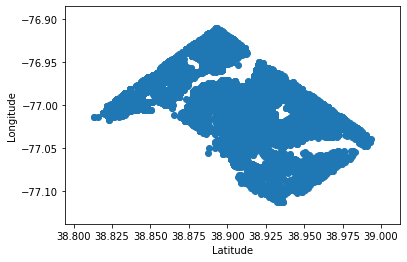

In [100]:
plt.scatter(df.Latitude,df.Longitude)
plt.xlabel('Latitude')
plt.ylabel('Longitude')

In [101]:
fig = go.Figure(data=go.Scattergeo(
        lon = df['Longitude'],
        lat = df['Latitude'],
        text = df['Magnitude'],
        mode = 'markers',
        marker_color = 25129,
        ))

fig.update_layout(
        title = 'Crime Report',
        geo_scope='usa',
    )
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



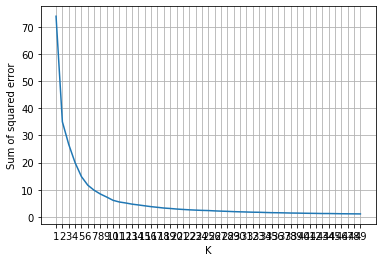

In [102]:
#Elbow Plot
sse = []
K = []
k_rng = range(1,50)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Latitude','Longitude']])
    sse.append(km.inertia_)
    K.append(k)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
axes= plt.axes()
axes.set_xticks(K)
plt.grid()
plt.plot(k_rng,sse)
#plt.scatter(k_rng,sse,color='green')

In [103]:
km = KMeans(n_clusters=10)
y_predicted = km.fit_predict(df[['Latitude','Longitude']])
y_predicted

array([5, 7, 8, ..., 0, 3, 8], dtype=int32)

In [104]:
df['cluster']=y_predicted
df.head()

Date   Latitude  Longitude Magnitude  cluster
0  2017-02-06T20:11:14.000Z  38.894376 -76.997556         4        5
1  2017-06-03T12:54:27.000Z  38.906838 -77.058661         6        7
2  2017-04-07T00:00:00.000Z  38.960739 -77.018034        16        8
3  2017-05-31T11:39:56.000Z  38.905151 -77.063998         4        7
4  2017-07-30T00:00:00.000Z  38.949532 -77.020246        16        8

In [105]:
km.cluster_centers_

array([[ 38.92641469, -77.02974548],
       [ 38.89264937, -76.9371217 ],
       [ 38.83484648, -76.99924809],
       [ 38.92535006, -76.9826415 ],
       [ 38.90252509, -77.02042195],
       [ 38.89318631, -76.99094894],
       [ 38.94713591, -77.07681316],
       [ 38.90856509, -77.05149109],
       [ 38.96131856, -77.02016992],
       [ 38.86072347, -76.9752667 ]])

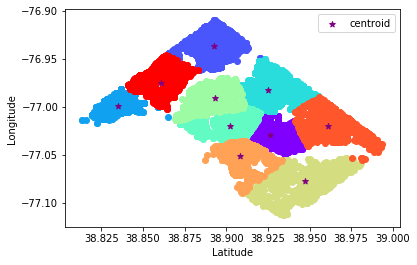

In [112]:
dfc = {}
colors = cm.rainbow(np.linspace(0, 1,10))
for c in range(0,10):
  dfc[c] = df[df.cluster==c]
  plt.scatter(dfc[c].Latitude,dfc[c].Longitude,color=colors[c])

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()

In [77]:
fig = go.Figure(go.Densitymapbox(
                  lat=quakes.Latitude, 
                  lon=quakes.Longitude, 
                  z=quakes.Magnitude, 
                  radius=1)
                )
fig.update_layout(mapbox_style="stamen-terrain", 
                  mapbox_center_lon=180)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.update_layout(
        title = 'Crime Report)',
        geo_scope='usa',
    )
fig.show()

df['text'] = df['Magnitude'] .astype(str)

fig = go.Figure(go.Scattergeo(
        lon = df['Longitude'],
        lat = df['Latitude'],
        text = df['text'],
        mode = 'markers',
        marker_color = 25129,
        ))

fig.update_layout(
        title = 'Crime Report',
        geo_scope='usa',
    )
fig.show()